In [73]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import re

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_excel('./rotulação/TweetsPolitical01 OK OK.xlsx')
df2 = pd.read_excel('./rotulação/TweetsPolitical02 OK OK.xlsx')
df3 = pd.read_excel('./rotulação/TweetsPolitical03 OK OK.xlsx')
df4 = pd.read_excel('./rotulação/TweetsPolitical04 OK OK.xlsx')
df5 = pd.read_excel('./rotulação/TweetsPolitical05 OK OK.xlsx')
df6 = pd.read_excel('./rotulação/TweetsPolitical06 OK OK.xlsx')
df7 = pd.read_excel('./rotulação/TweetsPolitical07 OK OK.xlsx')
df8 = pd.read_excel('./rotulação/TweetsPolitical08 OK OK.xlsx')
df9 = pd.read_excel('./rotulação/TweetsPolitical09 OK OK.xlsx')
df10 = pd.read_excel('./rotulação/TweetsPolitical10 OK OK.xlsx')
df11 = pd.read_excel('./rotulação/TweetsPolitical11 OK OK.xlsx')
df12 = pd.read_excel('./rotulação/TweetsPolitical12 OK OK.xlsx')
df13 = pd.read_excel('./rotulação/TweetsPolitical13 OK OK.xlsx')
df14 = pd.read_excel('./rotulação/TweetsPolitical14 OK OK.xlsx')
df15 = pd.read_excel('./rotulação/TweetsPolitical15 OK OK.xlsx')

lista = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

df_all = pd.concat(lista)
df_all.shape

(12670, 2)

In [3]:
df_all[df_all['Polaridade'] == -2]['Tweet'][488]
#df_all[df_all['Polaridade']
# df_remove = df_all[df_all['Polaridade'] == -2]
# ultimo_df = df_all.drop(df_remove.index)
# df_remove = df_all[df_all['Polaridade'] == 11]
# ultimo_df = df_all.drop(df_remove.index)

'Governo do #PSDB golpista &gt; Falta merenda - surrupiada - sobra polícia armada pra oprimir adolescentes que lutam por suas escolas públicas.\n'

<AxesSubplot:xlabel='Polaridade', ylabel='count'>

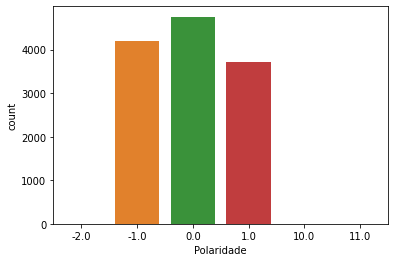

In [4]:
df_all.isnull().sum()
df_all = df_all.dropna()
df_all.isnull().sum()

sns.countplot(data=df_all, x='Polaridade')

In [5]:
df_all = df_all.reset_index()
df_all

,index,Tweet,Polaridade
0,0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...,...
12663,78,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,79,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,80,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,81,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [6]:
#df_all = df_all.drop(df_all[df_all['Polaridade'] == 0.0].index).reset_index()
df_all = df_all.drop(columns=['index'])
df_all.drop(df_all[df_all['Polaridade'] == 11].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == -2].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == 10].index, inplace=True)

df_all

,Tweet,Polaridade
0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...
12663,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [7]:
Tweet = df_all['Tweet']
polarity = np.asarray(df_all['Polaridade'])

polarity

array([0., 1., 1., ..., 1., 1., 1.])

In [8]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(12665, 24464)

In [119]:
#X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.57      0.80      0.66      1257
         0.0       0.67      0.66      0.67      1442
         1.0       0.62      0.35      0.45      1101

    accuracy                           0.62      3800
   macro avg       0.62      0.60      0.59      3800
weighted avg       0.62      0.62      0.60      3800



In [174]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [175]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [192]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [193]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train

<8865x26007 sparse matrix of type '<class 'numpy.float64'>'
	with 78373 stored elements in Compressed Sparse Row format>

In [194]:
X_test

<3800x26007 sparse matrix of type '<class 'numpy.float64'>'
	with 33250 stored elements in Compressed Sparse Row format>

In [195]:
one = OneHotEncoder(sparse=False)

y_one = one.fit_transform(Y_train.reshape(-1,1))

In [196]:
fit = model.fit(X_train.todense(), y_one, epochs=25, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/25
278/278 [==============================] - 5s 19ms/step - loss: 1.0209 - accuracy: 0.4819 - val_loss: 0.8783 - val_accuracy: 0.6011
Epoch 2/25
278/278 [==============================] - 5s 17ms/step - loss: 0.6452 - accuracy: 0.7658 - val_loss: 0.8588 - val_accuracy: 0.6258
Epoch 3/25
278/278 [==============================] - 5s 17ms/step - loss: 0.3128 - accuracy: 0.9029 - val_loss: 1.0439 - val_accuracy: 0.6100
Epoch 4/25
278/278 [==============================] - 5s 17ms/step - loss: 0.1667 - accuracy: 0.9542 - val_loss: 1.2364 - val_accuracy: 0.6061
Epoch 5/25
278/278 [==============================] - 5s 17ms/step - loss: 0.1044 - accuracy: 0.9725 - val_loss: 1.4337 - val_accuracy: 0.6013
Epoch 6/25
278/278 [==============================] - 5s 17ms/step - loss: 0.0739 - accuracy: 0.9794 - val_loss: 1.6003 - val_accuracy: 0.5984
Epoch 7/25
278/278 [==============================] - 5s 17ms/step - loss: 0.0594 - accuracy: 0.9844 - val_loss: 1.6687 - val_accuracy: 0.6039

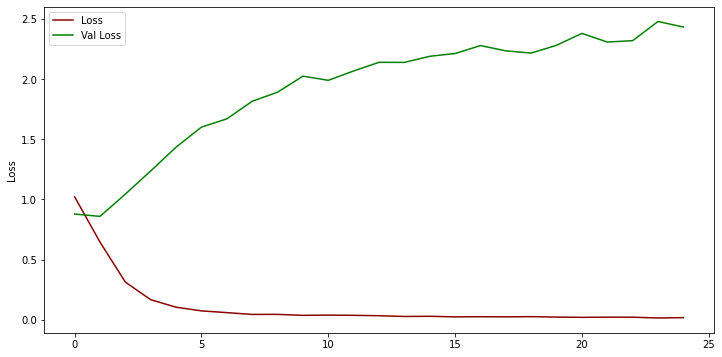

In [197]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.ylabel('Loss')
plt.show()

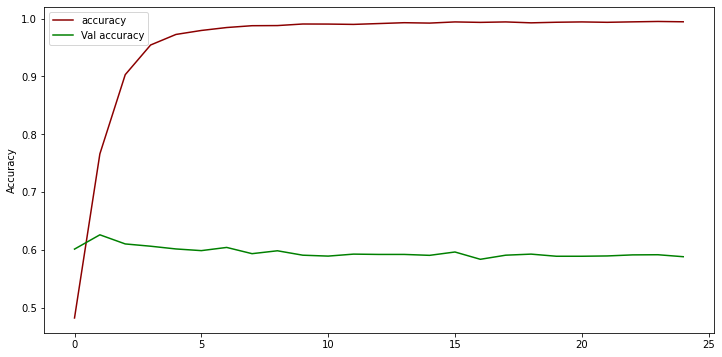

In [198]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [199]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 1s 9ms/step - loss: 2.4313 - accuracy: 0.5879


In [180]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['Tweet'])))

vocab = set_array(df_all['Tweet'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [185]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(25 , activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
X_train.shape

(8865,)

In [187]:
y_one = one.fit_transform(Y_train.reshape(-1,1))

In [188]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=50, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/50
70/70 [==============================] - 33s 468ms/step - loss: 1.0880 - accuracy: 0.4221 - val_loss: 1.0464 - val_accuracy: 0.5024
Epoch 2/50
70/70 [==============================] - 31s 441ms/step - loss: 0.9469 - accuracy: 0.5748 - val_loss: 0.9517 - val_accuracy: 0.5632
Epoch 3/50
70/70 [==============================] - 35s 495ms/step - loss: 0.7274 - accuracy: 0.7266 - val_loss: 0.9917 - val_accuracy: 0.5618
Epoch 4/50
70/70 [==============================] - 32s 459ms/step - loss: 0.5453 - accuracy: 0.8092 - val_loss: 1.0366 - val_accuracy: 0.5716
Epoch 5/50
70/70 [==============================] - 33s 474ms/step - loss: 0.4273 - accuracy: 0.8566 - val_loss: 1.1542 - val_accuracy: 0.5745
Epoch 6/50
70/70 [==============================] - 31s 445ms/step - loss: 0.3518 - accuracy: 0.8804 - val_loss: 1.2726 - val_accuracy: 0.5642
Epoch 7/50
70/70 [==============================] - 30s 431ms/step - loss: 0.2995 - accuracy: 0.9033 - val_loss: 1.3514 - val_accuracy: 0.5695

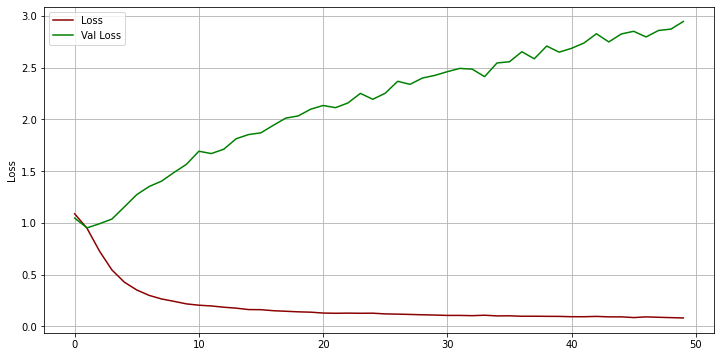

In [189]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

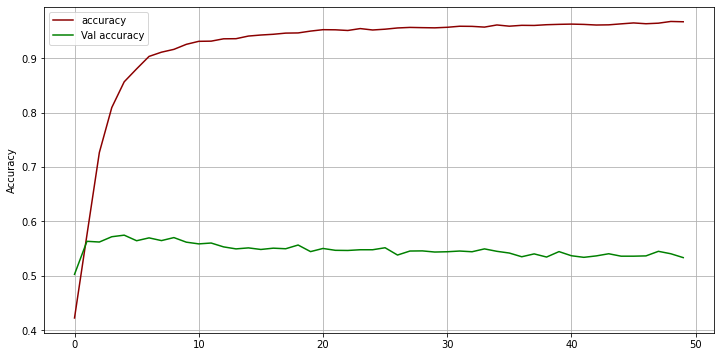

In [190]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [191]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 4s 37ms/step - loss: 2.9453 - accuracy: 0.5332
